In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
phys_supp = pd.read_csv("/Users/adamtsuchiyama/Documents/healthcare-bluebook-red-team/data/Medicare_Provider_Util_Payment_PUF_CY2017.txt", sep='\t', usecols=['npi', 'nppes_provider_last_org_name', 'nppes_entity_code', 'nppes_provider_zip', 'nppes_provider_state', 'provider_type', 'place_of_service', 'hcpcs_code', 'bene_day_srvc_cnt', 'average_Medicare_allowed_amt'], dtype={'npi': str, 'nppes_provider_last_org_name' : str, 'nppes_entity_code' : str, 'nppes_provider_zip' : str, 'nppes_provider_state' : str, 'provider_type' : str, 'place_of_service' : str, 'hcpcs_code' : str, 'bene_day_srvc_cnt' : float, 'average_Medicare_allowed_amt' : float})



In [4]:
phys_supp['zip_5digits'] = phys_supp['nppes_provider_zip'].str[:5]

In [5]:
print(phys_supp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9847444 entries, 0 to 9847443
Data columns (total 11 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   npi                           object 
 1   nppes_provider_last_org_name  object 
 2   nppes_entity_code             object 
 3   nppes_provider_zip            object 
 4   nppes_provider_state          object 
 5   provider_type                 object 
 6   place_of_service              object 
 7   hcpcs_code                    object 
 8   bene_day_srvc_cnt             float64
 9   average_Medicare_allowed_amt  float64
 10  zip_5digits                   object 
dtypes: float64(2), object(9)
memory usage: 826.4+ MB
None


In [6]:
hosp_op = pd.read_excel("/Users/adamtsuchiyama/Documents/healthcare-bluebook-red-team/data/MUP_OHP_R19_P04_V10_D17_APC_Provider.xlsx", header=5, usecols=['Provider ID', 'Provider Name', 'Provider\nState', 'Provider\nZip Code', 'APC', 'Comprehensive APC\nServices', 'Average\nMedicare\nAllowed\nAmount'], dtype={'Provider ID' : str, 'Provider Name' : object, 'Provider\nState' : object, 'Provider\nZip Code' : str,  'APC' : object, 'Comprehensive APC\nServices' : int, 'Average\nMedicare\nAllowed\nAmount' : float})



In [7]:
print(hosp_op.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61779 entries, 0 to 61778
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provider ID                      61779 non-null  object 
 1   Provider Name                    61779 non-null  object 
 2   Provider
State                   61779 non-null  object 
 3   Provider
Zip Code                61779 non-null  object 
 4   APC                              61779 non-null  object 
 5   Comprehensive APC
Services       61779 non-null  int64  
 6   Average
Medicare
Allowed
Amount  61779 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.3+ MB
None


In [8]:
hosp_op = hosp_op.rename(columns={'Provider\nState' : 'Provider State', 'Provider\nZip Code' : 'Provider Zip Code', 'Comprehensive APC\nServices' : 'Comprehensive APC Services', 'Average\nMedicare\nAllowed\nAmount' : 'Average Medicare Allowed Amount'})



In [9]:
print(hosp_op.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61779 entries, 0 to 61778
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provider ID                      61779 non-null  object 
 1   Provider Name                    61779 non-null  object 
 2   Provider State                   61779 non-null  object 
 3   Provider Zip Code                61779 non-null  object 
 4   APC                              61779 non-null  object 
 5   Comprehensive APC Services       61779 non-null  int64  
 6   Average Medicare Allowed Amount  61779 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.3+ MB
None


In [10]:
apc_cw = pd.read_excel("/Users/adamtsuchiyama/Documents/healthcare-bluebook-red-team/data/2020_january_web_addendum_b.12312019.xlsx", header=2, usecols=['HCPCS Code', 'APC ', 'Relative Weight', 'Payment Rate ', 'Minimum Unadjusted Copayment '], dtype={'HCPS Code' : str, 'APC ' : str, 'Relative Weight' : float, 'Payment Rate ' : float, 'Minimum Unadjusted Copayment ' : float})



In [11]:
print(apc_cw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16628 entries, 0 to 16627
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   HCPCS Code                     16628 non-null  object 
 1   APC                            5942 non-null   object 
 2   Relative Weight                5516 non-null   float64
 3   Payment Rate                   5936 non-null   float64
 4   Minimum Unadjusted Copayment   5936 non-null   float64
dtypes: float64(3), object(2)
memory usage: 649.7+ KB
None


In [12]:
apc_cw = apc_cw.rename(columns={'APC ' : 'APC', 'Payment Rate ' : 'Payment Rate', 'Minimum Unadjusted Copayment ' : 'Minimum Unadjusted Copayment'})

In [13]:
zip_cbsa = pd.read_excel("/Users/adamtsuchiyama/Documents/healthcare-bluebook-red-team/data/ZIP_CBSA_032020.xlsx", usecols=['ZIP', 'CBSA'], dtype={'ZIP' : object, 'CBSA' : object})



In [14]:
zip_cbsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47415 entries, 0 to 47414
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ZIP     47415 non-null  object
 1   CBSA    47415 non-null  object
dtypes: object(2)
memory usage: 741.0+ KB


In [15]:
phys_nash = pd.merge(phys_supp, zip_cbsa, how='left', left_on='zip_5digits', right_on='ZIP')
phys_nash = pd.merge(phys_nash, apc_cw, how='left', left_on='hcpcs_code', right_on='HCPCS Code')

In [16]:
phys_nash = phys_nash[phys_nash['APC'] == '5302']

In [17]:
phys_nash = phys_nash[phys_nash['provider_type'] == 'Ambulatory Surgical Center']

In [18]:
phys_nash = phys_nash[phys_nash['CBSA'] == '34980']

In [19]:
phys_nash = phys_nash.drop(['zip_5digits', 'HCPCS Code', 'nppes_provider_last_org_name', 'nppes_entity_code', 'nppes_provider_zip', 'nppes_provider_state', 'provider_type', 'hcpcs_code', 'ZIP', 'CBSA', 'APC', 'Relative Weight', 'Payment Rate', 'Minimum Unadjusted Copayment'], axis=1)
print(phys_nash.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1419490 to 6997002
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   npi                           8 non-null      object 
 1   place_of_service              8 non-null      object 
 2   bene_day_srvc_cnt             8 non-null      float64
 3   average_Medicare_allowed_amt  8 non-null      float64
dtypes: float64(2), object(2)
memory usage: 320.0+ bytes
None


In [20]:
phys_nash = phys_nash.drop('place_of_service', axis=1)
print(phys_nash.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1419490 to 6997002
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   npi                           8 non-null      object 
 1   bene_day_srvc_cnt             8 non-null      float64
 2   average_Medicare_allowed_amt  8 non-null      float64
dtypes: float64(2), object(1)
memory usage: 256.0+ bytes
None


In [21]:
phys_nash = phys_nash.rename(columns={'npi' : 'npi/provider_id', 'bene_day_srvc_cnt' : 'service_cnt', 'average_Medicare_allowed_amt' : 'med_allwd_amt'})

In [22]:
print(phys_nash.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1419490 to 6997002
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   npi/provider_id  8 non-null      object 
 1   service_cnt      8 non-null      float64
 2   med_allwd_amt    8 non-null      float64
dtypes: float64(2), object(1)
memory usage: 256.0+ bytes
None


In [23]:
print(np.shape(phys_nash))

(8, 3)


In [24]:
hosp_nash = pd.merge(hosp_op, zip_cbsa, how='left', left_on='Provider Zip Code', right_on='ZIP')

In [25]:
hosp_nash = hosp_nash[hosp_nash['APC'] == 5302]

In [26]:
hosp_nash = hosp_nash[hosp_nash['CBSA'] == '34980']

In [27]:
hosp_nash = hosp_nash.drop(['Provider Zip Code','Provider Name', 'Provider State', 'APC', 'ZIP', 'CBSA'], axis=1)
print(hosp_nash.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 57329 to 59055
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Provider ID                      17 non-null     object 
 1   Comprehensive APC Services       17 non-null     int64  
 2   Average Medicare Allowed Amount  17 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 544.0+ bytes
None


In [28]:
hosp_nash = hosp_nash.rename(columns={'Provider ID' : 'npi/provider_id', 'Comprehensive APC Services' : 'service_cnt', 'Average Medicare Allowed Amount' : 'med_allwd_amt'})

In [29]:
print(hosp_nash.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 57329 to 59055
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   npi/provider_id  17 non-null     object 
 1   service_cnt      17 non-null     int64  
 2   med_allwd_amt    17 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 544.0+ bytes
None


In [30]:
print(np.shape(hosp_nash))

(17, 3)


In [31]:
phys_hosp_union = pd.concat([phys_nash, hosp_nash], ignore_index=True)
print(phys_hosp_union)

   npi/provider_id  service_cnt  med_allwd_amt
0       1124498357         16.0     660.990000
1       1225039761         17.0     565.636471
2       1225039761         14.0     587.110000
3       1235376104         17.0     550.540000
4       1235376104         21.0     537.431905
5       1295708964         34.0     587.110000
6       1427152073         23.0     587.110000
7       1639299803         33.0     587.110000
8           440003        114.0    1223.454825
9           440006         15.0    1248.620000
10          440029         18.0    1248.620000
11          440039        623.0    1205.620546
12          440046         13.0    1095.567692
13          440053         55.0    1248.620000
14          440065         29.0    1248.620000
15          440073        254.0    1229.639134
16          440082        207.0    1224.590048
17          440111         12.0    1248.620000
18          440133         98.0    1238.468571
19          440150         21.0    1159.030952
20          4

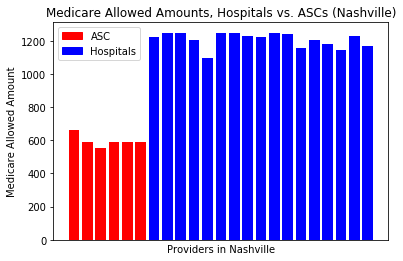

In [53]:
colors = []
for amt in phys_hosp_union['med_allwd_amt']:
    if amt < 700:
        colors.append('red')
    else:
        colors.append('blue')
labels = {'ASC' : 'red', 'Hospitals' : 'blue'}
labels2 = list(labels.keys())
plt.bar(phys_hosp_union['npi/provider_id'], phys_hosp_union['med_allwd_amt'], color=colors, label=labels)
handles = [plt.Rectangle((0,0),1,1, color=labels[label]) for label in labels2]
plt.xticks([])
plt.xlabel('Providers in Nashville')
plt.ylabel('Medicare Allowed Amount')
plt.title('Medicare Allowed Amounts, Hospitals vs. ASCs (Nashville)')
plt.legend(handles, labels2)
plt.show()

ASC's costs are significantly lower than hospitals. This is most likely due to ASCs being a facility place of service, meaning the bill has likely been split between multiple providers.

In [117]:
phys_mean = np.mean(phys_nash['med_allwd_amt'])
print(phys_mean)

582.87979691875


In [118]:
hosp_mean = np.mean(hosp_nash['med_allwd_amt'])
print(hosp_mean)

1208.848899031107
